In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

Будем учиться классифицировать жанры музыки, полузуюсь не аудио дорожками, а уже осмысленными признаками (правда, не все из них имеют понятные названия). Сами данные можно найти [здесь](https://www.kaggle.com/purumalgi/music-genre-classification). Будем использовать файл `train.csv`. Нашей задачей будет предсказание переменной `Class` (жанр песни) при помощи деревьев решений. Можно попробовать также другие методы классификации, которые мы прошли, и сравнить результаты. При обучении всех моделей не забывайте про разделение на тренировку и тест (или кросс валидацию [ссылка](https://www.youtube.com/watch?v=fSytzGwwBVw)).

### Задание 1. EDA (10 баллов)

Как обычно, начнем с того, что посмотрим на наши данные: типы переменных, пропущенные значения, баланс классов и все такое. Ваш ход:

In [20]:
data = pd.read_csv("train.csv")
data.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


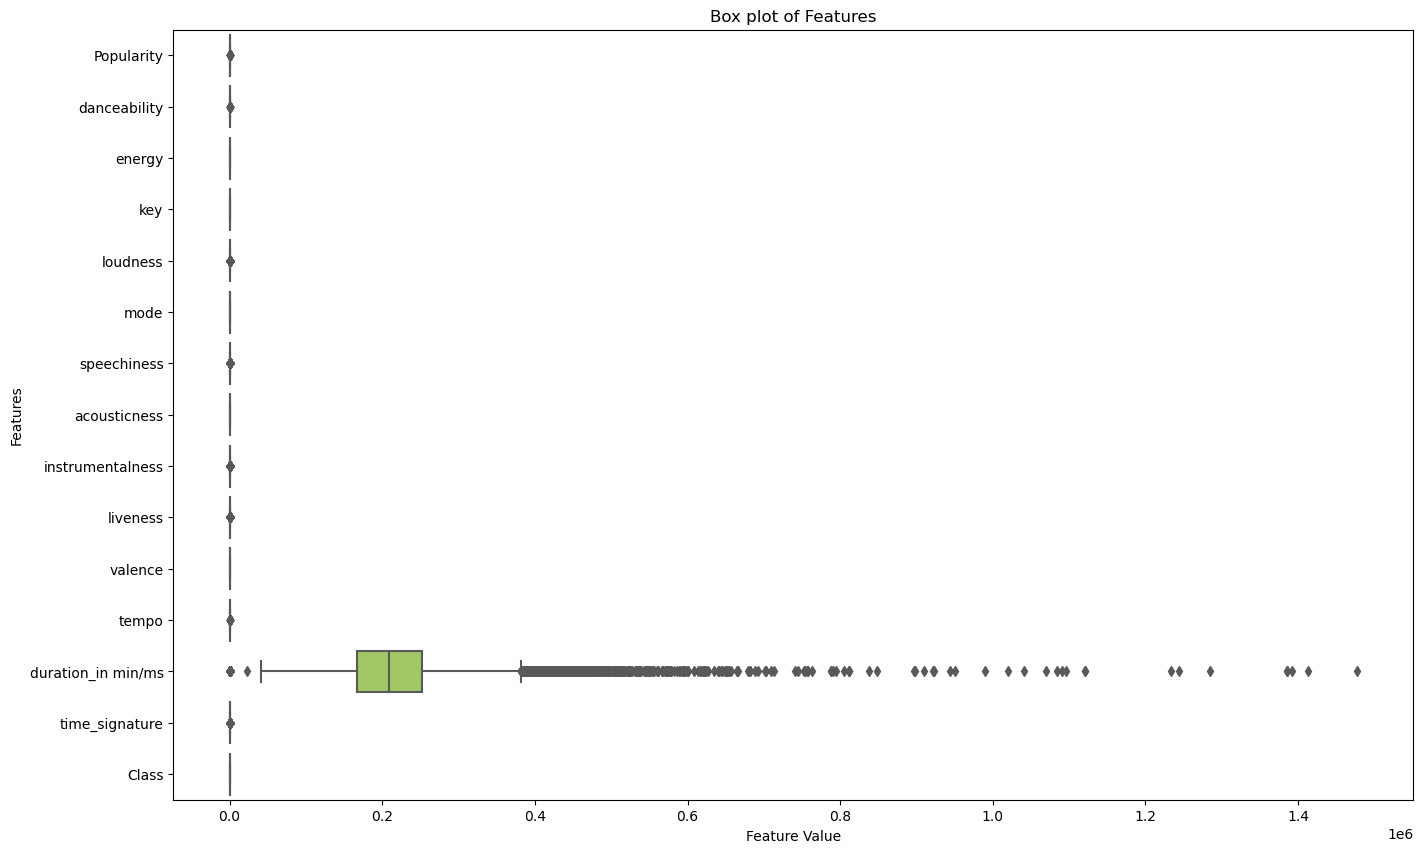

In [3]:
plt.figure(figsize=(16, 10))

sns.boxplot(data=data, orient="h", palette="Set2")

plt.title("Box plot of Features")
plt.xlabel("Feature Value")
plt.ylabel("Features")

plt.show()

Сразу напрягает название колонки с длительностью. То ли минуты, то ли миллисекунды, - да и разброс какой-то прям сильный

In [4]:
data['duration_in min/ms'].max()

1477187.0

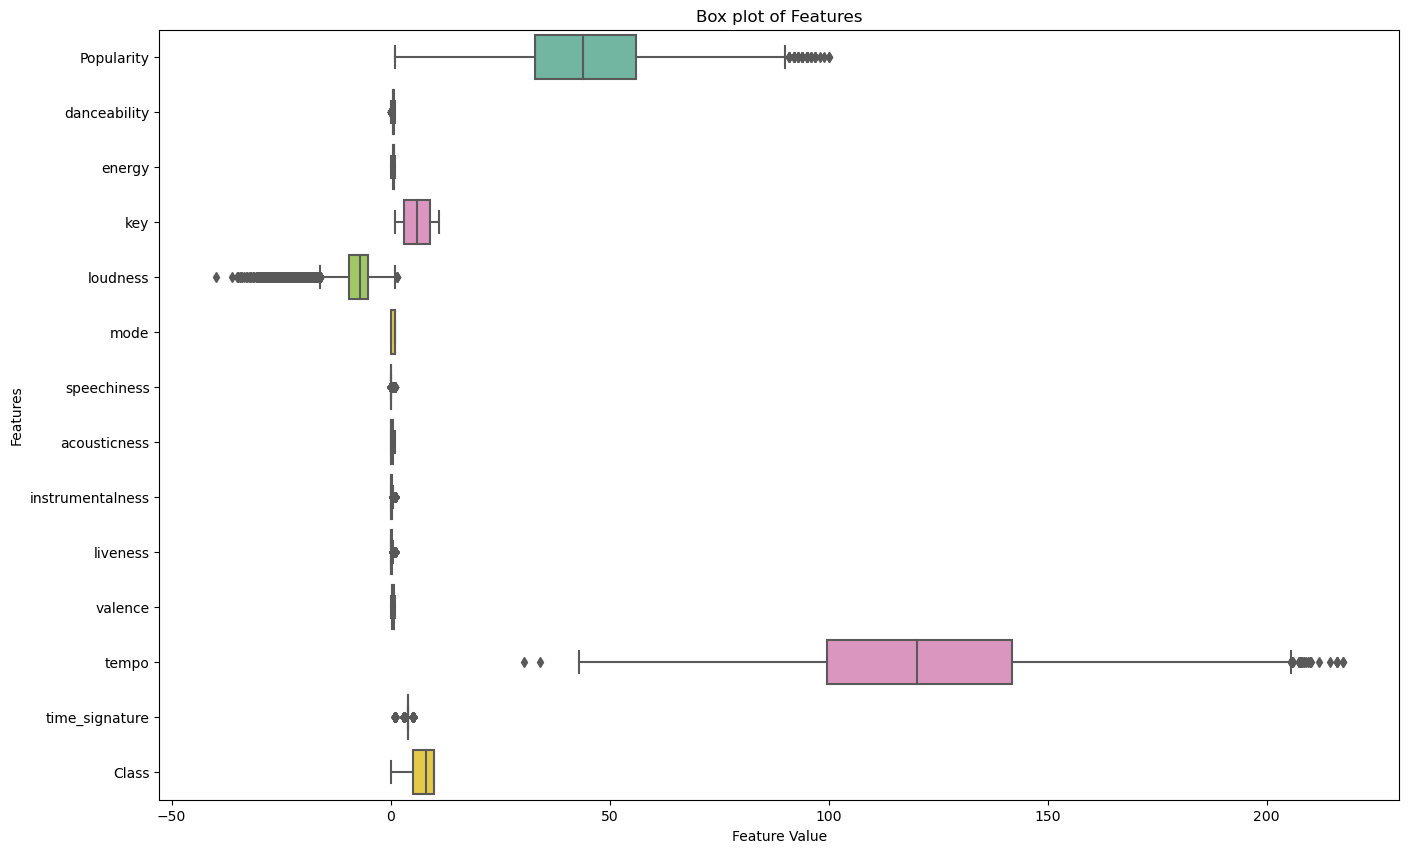

In [5]:
plt.figure(figsize=(16, 10))

sns.boxplot(data=data.loc[:, data.columns != 'duration_in min/ms'], orient="h", palette="Set2")

plt.title("Box plot of Features")
plt.xlabel("Feature Value")
plt.ylabel("Features")

plt.show()

Выделим категориальные переменные

In [3]:
import my_eda

my_eda.run_eda(data)

pRiVeT)0)))00000!
Number of observations (rows) is:	17996
Number of features (columns) is:	17
['key', 'mode', 'time_signature', 'Class'] are likely categorical.
key column has 11 unique values out of total 15982 - (0.0007)
mode column has 2 unique values out of total 17996 - (0.0001)
time_signature column has 4 unique values out of total 17996 - (0.0002)
Class column has 11 unique values out of total 17996 - (0.0006)
['Popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_in min/ms'] are not categorical.

Statistics for column Popularity: 
Min:	1.0
Max:	100.0
Mean:	44.51212431693989
Std:	17.426927709383666
0.25 Quartile:	33.0
Median:	44.0
0.75 Quartile:	56.0
IQR:	23.0
Outliers: 17996

Statistics for column danceability: 
Min:	0.0596
Max:	0.989
Mean:	0.5434332184929985
Std:	0.16626847956751345
0.25 Quartile:	0.432
Median:	0.545
0.75 Quartile:	0.659
IQR:	0.22700000000000004
Outliers: 17996

Statisti

In [ ]:
# Возьмем Class как таргетную переменную. Посмотрим на баланс классов
data['Class'].plot(kind='hist')

### Задание 2. Обучение дерева решений (10 баллов)

Предобработайте признаки так, чтобы их можно было подать в модель дерева решений и обучите ее, постарайтесь подобрать оптимальные гиперпараметры, которые вам известны. Постарайтесь также обосновать выбор метрики в данном случае. При подборе гиперпараметров может помочь `GridSearchCV` [ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [22]:
data.drop(columns=['Artist Name', 'Track Name'], inplace=True)

data.dropna(inplace=True)

# я так понимаю, это можно не делать, т.к. деревья могут интерпретировать инты as is
# cat_columns = ['key', 'mode', 'time_signature']
# data = pd.get_dummies(data, columns=cat_columns, drop_first=True)

X = data.drop(columns=['Class'])
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)

In [12]:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

des_tree = DecisionTreeClassifier()

In [17]:
grid_search = GridSearchCV(des_tree, param_grid, cv=5, n_jobs=4)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

y_pred = grid_search.predict(X_test)

class_rep = classification_report(y_test, y_pred)
print(class_rep)

Best Hyperparameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.52      0.75      0.62       102
           1       0.44      0.05      0.09       325
           2       0.37      0.30      0.33       267
           3       0.57      0.61      0.59        76
           4       0.52      0.47      0.49        49
           5       0.54      0.38      0.45       157
           6       0.34      0.37      0.35       578
           7       0.94      0.86      0.90       135
           8       0.67      0.46      0.54       485
           9       0.36      0.35      0.35       347
          10       0.44      0.64      0.52      1023

    accuracy                           0.46      3544
   macro avg       0.52      0.48      0.48      3544
weighted avg       0.47      0.46      0.44      3544



### Задание 3. Другие модели (без баллов, просто если есть желание)

Проделайте операции из **Задания 2** с другими известными вам классификаторами. Стало ли лучше?

In [21]:
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 10, 50, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'log2', 'sqrt'],
    'bootstrap': [True, False]
}

rf_clf = RandomForestClassifier()

In [23]:
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

y_pred = grid_search.predict(X_test)

class_rep = classification_report(y_test, y_pred)
print(class_rep)

### Задание 4. (0.5 доп. балла)

Расскажите про свои любимые фильмы, мультики и тд.

1.

2.

3.